# Eksploracyjna Analiza Danych

In [1]:
!pip install datasets transformers evaluate scikit-learn matplotlib seaborn tensorflow


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


### Import i wczytanie danych

In [2]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

dataset = load_dataset("sh0416/ag_news")
dataset


/Users/GruszkaStudent/pjatk(Engineer)/ZUM/ZUM_2025_DanielGruszkowski/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['label', 'title', 'description'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['label', 'title', 'description'],
        num_rows: 7600
    })
})

### Podgląd i mapowanie etykiet

In [3]:
label2name = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}

def add_label_name(example):
    example["label_name"] = label2name[example["label"]]
    return example

dataset = dataset.map(add_label_name)

dataset["train"][0]


{'label': 3,
 'title': 'Wall St. Bears Claw Back Into the Black (Reuters)',
 'description': "Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.",
 'label_name': 'Business'}

### Zamiana na DataFrame

In [4]:
train_df = pd.DataFrame(dataset["train"])
test_df  = pd.DataFrame(dataset["test"])

train_df.head()

,label,title,description,label_name
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Business
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Business
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Business
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Business
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",Business


### Podstawowe informacje

In [5]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

print("\nTrain columns:", train_df.columns.tolist())
print("\nTrain info():")
print(train_df.info())


Train shape: (120000, 4)
Test shape: (7600, 4)

Train columns: ['label', 'title', 'description', 'label_name']

Train info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   label        120000 non-null  int64 
 1   title        120000 non-null  object
 2   description  120000 non-null  object
 3   label_name   120000 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.7+ MB
None


### Rozkład klas

In [6]:
train_df["label_name"].value_counts()

label_name
Business    30000
Sci/Tech    30000
Sports      30000
World       30000
Name: count, dtype: int64

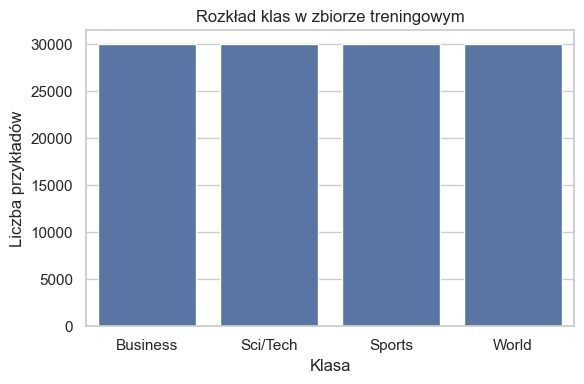

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x="label_name",
              order=train_df["label_name"].value_counts().index)
plt.title("Rozkład klas w zbiorze treningowym")
plt.xlabel("Klasa")
plt.ylabel("Liczba przykładów")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Długość tekstu

In [8]:
train_df["title_len"] = train_df["title"].str.split().apply(len)
train_df["desc_len"]  = train_df["description"].str.split().apply(len)
train_df["text"]      = train_df["title"] + " " + train_df["description"]
train_df["text_len"]  = train_df["text"].str.split().apply(len)

train_df[["title_len", "desc_len", "text_len"]].describe()

,title_len,desc_len,text_len
count,120000.000000,120000.000000,120000.000000
mean,6.784758,31.062692,37.847450
std,2.087255,9.757035,10.085245
min,1.000000,3.000000,8.000000
25%,5.000000,25.000000,32.000000
50%,7.000000,30.000000,37.000000
75%,8.000000,36.000000,43.000000
max,19.000000,173.000000,177.000000


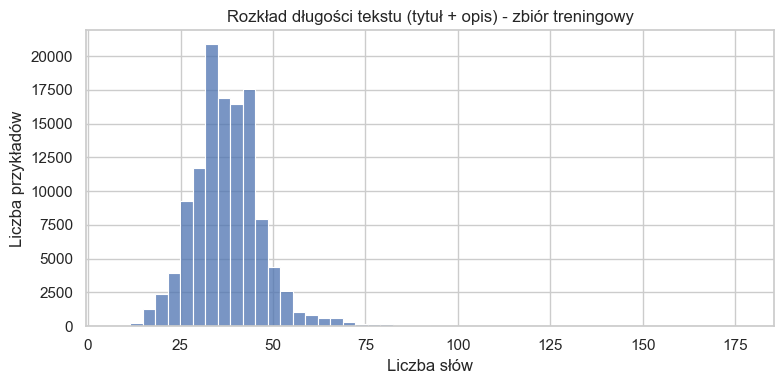

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(train_df["text_len"], bins=50)
plt.title("Rozkład długości tekstu (tytuł + opis) - zbiór treningowy")
plt.xlabel("Liczba słów")
plt.ylabel("Liczba przykładów")
plt.tight_layout()
plt.show()

### Brakujące wartości

In [10]:
train_df.isna().sum()

train_df["text"] = train_df["title"] + " " + train_df["description"]
dup_count = train_df.duplicated(subset=["text"]).sum()
dup_count


0

### Przykłady z każdej klasy

In [11]:
for label_id, label_name in label2name.items():
    print()
    print("="*80)
    print(f"Klasa {label_id} – {label_name}")
    sample_rows = train_df[train_df["label"] == label_id].sample(3, random_state=42)
    for _, row in sample_rows.iterrows():
        print("\nTITLE:", row["title"])
        print("DESC :", row["description"])


Klasa 1 – World

TITLE: Explosion Rocks Baghdad Neighborhood
DESC : BAGHDAD, Iraq, August 24 -- A car bomb exploded near the gate of a US-funded Iraqi television network in Baghdad on Tuesday, killing at least two people and wounding two others, authorities and witnesses said.

TITLE: BBC reporters' log
DESC : BBC correspondents record events in the Middle East and their thoughts as the funeral of the Palestinian leader Yasser Arafat takes place.

TITLE: Israel welcomes Rice nomination; Palestinians wary
DESC : Israel on Tuesday warmly welcomed the naming of Condoleezza Rice as America #39;s top diplomat, but Palestinians were wary, saying the new Bush administration must put more energy into the quest for Middle East peace.

Klasa 2 – Sports

TITLE: Second Andre win in a row boosts US gold medal hopes
DESC : Andre Dirrell, fighting with a tattoo of his grandfather #39;s face on his back, assured the United States of at least two boxing medals Wednesday by narrowly beating Cuba #39;s 

# Wnioski z analizy danych (EDA)

## Na podstawie przeprowadzonej analizy zbioru sh0416/ag_news można wyciągnąć następujące obserwacje:

### 1) Wielkość zbioru danych

Zbiór treningowy zawiera 120 000 przykładów, a zbiór testowy 7 600.

Liczba próbek jest wystarczająca do trenowania zarówno klasycznych modeli ML, jak i głębokich sieci neuronowych oraz modeli transformerowych.

### 2) Struktura danych

Każdy rekord składa się z:

- title - tytułu artykułu,

- description - krótkiego opisu,

- label - etykiety określającej temat artykułu.


### 3) Rozkład klas

W zbiorze występują cztery kategorie: World, Sports, Business, Sci/Tech.

Dane są dobrze zbalansowane - każda klasa ma około 30 000 próbek, co ułatwia trenowanie modeli i minimalizuje problemy z biasem.

Długość tekstu

Tytuły są krótkie (średnio ok. 7-10 słów).

Opisy zazwyczaj mają 20-40 słów.

Połączony tekst (title + description) zwykle mieści się w przedziale 30-60 słów, co jest korzystne dla modeli transformerowych (brak bardzo długich sekwencji).

### 4) Jakość danych

Nie stwierdzono istotnych braków danych - pola title i description są wypełnione.

Duplikaty są nieliczne i nie powinny znacząco wpływać na modele.

Teksty są czyste, bez niepożądanych znaków czy HTML.